[Distribution discrète](#galton)
* [tirage simple](#nvalue)
* [tirages multiples](#pvalue)
* [distribution gaussienne de la moyenne](#fitNorm)
* [une expérience plus visuelle](#galtonvid)

[Distributions continues](#continues)
* [Distribution rectangulaire](#continues)
    * [tirage simple](#rect1)
    * [tirages multiples](#rect2)
    * [distribution gaussienne de la moyenne](#rect3)
* [Distribution triangulaire](#triang)
    * [tirage simple](#triang1)
    * [tirages multiples et distribution gaussienne](#triang2)
* [Une distribution qui ne vérifie pas le théorème central limite : distribution de Lorentz/Cauchy](#cauchy)


# Démonstration intuitive du théorème de la limite centrale

La distribussion gaussienne est au cœur des formules utilisées en métrologie. Et ce alors que bien souvent, les distributions des variables implicites ne sont pas forcément gaussiennes. Sans être rigoureux, le but de ce cahier est de montrer comment il est possible d'arriver à des variables de sortie gaussiennes pour des variables d'entrée qui ne le sont pas forcément.

On rappelle qu'une distribution gaussienne de valeur moyenne $\bar{z}$ et d'écart-type $\sigma$  est donnée par :
$$  G_{\bar{z},\sigma}(z)=\dfrac{1}{\sigma\sqrt{2\pi}}\exp\left( {-\dfrac{\left( z-\bar{z} \right)^{2}}{2\sigma^{2}}} \right)$$

## Distribution discrète : pile ou face, ou la planche de Galton
<span id="galton"></span>

L'idée est de partir du lancer d'une pièce en supposant qu'il y a 50% de chances de faire pile et 50% de chance de faire face. Le résultat pile correspond à un résultat de 1 tandis que face correspond à 0. 

Maintenant, au lieu de faire un unique tirage, l'idée est de faire une succession de $n$ tirages avec une valeur de $n$ relativement grande. Ensuite, nous allons additionner toutes les valeurs (le total est donc compris entre 0 et $n$) puis prendre la valeur moyenne pour avoir un résultat forcément compris entre 0 et 1 :
$$\bar{z}=f(z_1,...z_n)=\dfrac{1}{n}\sum_{i=1}^nz_i$$
<span id="nvalue"></span>

In [1]:
import numpy as np
n = 100
#Ici, on choisit de faire un tirage de n=100 valeurs
premier_tirage = np.random.randint(2, size=n)
print('{} tirages compris entre zéro et un'.format(n))
print(premier_tirage)
#on additionne les n valeurs et on prend la moyenne
z0 = np.sum(premier_tirage)/n
print('la valeur moyenne correspondante est : {:.2f}'.format(z0))

100 tirages compris entre zéro et un
[1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1
 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0
 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0]
la valeur moyenne correspondante est : 0.39


Normalement, le résultat final devrait être proche de 0,5 mais pas forcément égal. N'hésitez pas à ré-exécuter le code ci-dessus pour voir que la valeur obtenue n'est pas fixe.

Maintenant, nous allons répeter cette opération $p$ fois pour observer la distribution des résultats.<span id="pvalue"></span>

"\nRelancer le tirage plusieurs fois, puis changer la valeur de p pour voir son influence.\n\n\nPour ré-éxecuter le code, appuyer sur la touche 'haut' puis sur 'Shift+Enter'\n"

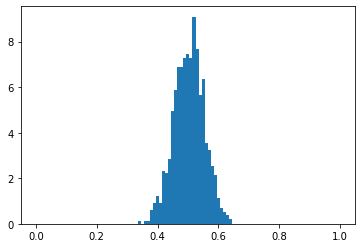

In [2]:
p = 1000
zs = np.sum(np.random.randint(2, size=(n,p)), axis = 0 )/n

#print('les {} résultats obtenus :'.format(p)) 
#print(zs) 
#si on veut vérifier le fait qu'il y ait bien 10000 résultats
#print(zs.shape) 


"""
Nous allons maintenant tracer la distribution des résultats pour les différentes valeurs moyennes trouvées.
"""

import matplotlib as mpl
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(zs,bins=101,range=(0.,1.),density=True)
"""
Relancer le tirage plusieurs fois, puis changer la valeur de p pour voir son influence.


Pour ré-éxecuter le code, appuyer sur la touche 'haut' puis sur 'Shift+Enter'
"""


Pour $p=1000$, la distribution des résultats peut avoir une forme « bizarroïde », mais pour 10 000, 100 000 ou 1 million de tirages, la distribution devient très stable et tend vers une courbe qui est ... la distribution gaussienne. Il est intéressant d'essayer de faire le lien entre les différentes valeurs du problème et la distribution gaussienne correspondante. Il faut donc trouver la valeur moyenne et la variance des différentes valeurs.
<span id="fitNorm"></span>

In [3]:
#Moyenne de la distribution
moyenne = np.average(zs)
#variance de la distribution
variance = np.var(zs,ddof=1)
ecartType= np.std(zs,ddof=1)
print('moyenne: {} variance : {} écart-type : {}'.format(moyenne, variance,ecartType))

moyenne: 0.50359 variance : 0.002451663563563564 écart-type : 0.0495142763611018


Il est possible de comparer les valeurs obtenues aux valeurs théoriques. La valeur moyenne théorique est de 0,5. Pour l'écart-type, cela demande un peu plus de travail, il faut commencer par calculer la variance :
$$\begin{align}
V(z_i)={}&=\dfrac{1}{2}\sum_{j=1}^2(z_j-\bar{z})^2=0,25\\
V(\bar{z})={}&\dfrac{1}{n} \sum_{j=1}^n V(z_i) =\dfrac{1}{n} \times 0,25 \\
\sigma_\bar{z} ={}& \sqrt{V(\bar{z})} = \dfrac{\sigma_{z_i} }{\sqrt{n}}
\end{align}$$
Numériquement, les deux résulats calculés ci-dessus à partir de la distribution théorique doivent être proches de ceux trouvés numériquement.


**De plus, ce résultat est intéressant car on peut voir que la variance sur la valeur moyenne $\bar{z}$ décroit en $\frac{1}{n}$, donc plus l'opération de moyenne se fait sur un grand échantillon, plus l'incertitude-type sur la valeur moyenne sera faible.** C'est un résultat très important en métrologie : plus l'échantillonage est grand, plus la valeur moyenne est connue avec une incertitude-type faible et ce quelle que soit l'incertitude-type sur les $z_i$.

Il est possible de « confirmer » ce résultat en changeant la valeur de $n$ [ci-dessus](#nvalue).

Maintenant que l'on a déterminé les valeurs de la gaussienne théorique correspondant à partir de la valeur moyenne et de son incertitude-type, il est possible de superposer les deux pour comparer les résultats. Normalement, plus la valeur de $p$ définie [ci-dessus](#pvalue) est grande, plus les deux grandeurs doivent être proches.

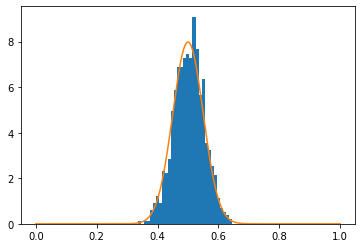

In [4]:
#Tracé de l'histogramme
plt.hist(zs,bins=101,range=(0.,1.),density=True)
#Tracé de la gaussienne correspondant
xs=np.linspace(0,1,1000)
from scipy.stats import norm
plt.plot(xs, norm.pdf(xs,loc=0.5,scale=np.sqrt(0.25/n) ) )

<span id="galtonvid"></span>
On vient de « montrer » indirectement qu'une distribution binomiale tend vers une distribution gaussienne. C'est visualisable avec la planche de Galton (vidéo ci-dessous) où le nombre de rangées de pics correspon à la valeur de $n$ et le nombre de billes à la valeur de $p$. L'indice de la colonne étant la valeur moyenne.

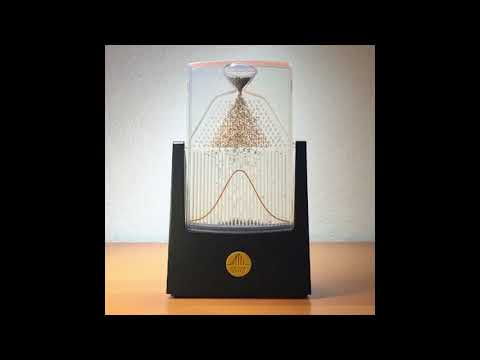

In [5]:
from IPython.display import YouTubeVideo

YouTubeVideo('EvHiee7gs9Y', width=600, height=400)

## Cas des distributions continues
<span id="continues"></span>
### Distribution rectangulaire
Au lieu de prendre une distribution discrète, on va maintenant prendre une distribution continue : la distribution rectangulaire. Pour simplifier, on prend un distribution uniforme sur l'intervalle $[0,1[$.
<span id="rect1"></span>

la valeur moyenne correspondante est : 0.55


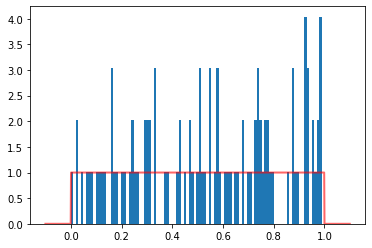

In [6]:
#Ici, on choisit de faire un tirage de n valeurs
premier_tirage = np.random.uniform(0.,1., size=n)
plt.hist(premier_tirage,bins=101,range=(0.,1.),density=True)

#affichage de la fonction de distribution théorique
from scipy.stats import uniform
xs = np.linspace(-0.1,1.1,1000)
plt.plot(xs, uniform.pdf(xs,loc=0.,scale=1),'r-', lw=2, alpha=0.6, label='distribution uniforme')


#on additionne les n valeurs et on prend la moyenne
z0 = np.sum(premier_tirage)/n
print('la valeur moyenne correspondante est : {:.2f}'.format(z0))

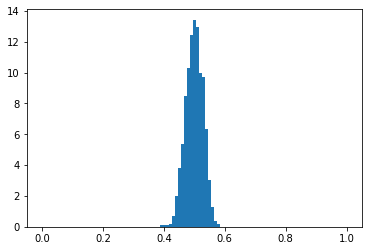

In [7]:
#on répète maintenant l'opération p fois
zs = np.sum(np.random.uniform(0.,1., size=(n,p)), axis = 0 )/n
count, bins, ignored = plt.hist(zs,bins=101,range=(0.,1.),density=True)

<span id="rect2"></span>Comme précédemment, on peut calculer la valeur moyenne et l'écart-type de la distribution des $\bar{z}$. Il est toujours possible de changer les valeurs [de $n$](#nvalue) [ou $p$](#pvalue) (ré-éxecuter le code complet avec l'icône correspondante).

In [8]:
#Moyenne de la distribution
moyenne = np.average(zs)
#variance de la distribution
variance = np.var(zs,ddof=1)
ecartType= np.std(zs,ddof=1)
print('moyenne: {} variance : {} écart-type : {}'.format(moyenne, variance,ecartType))


moyenne: 0.49941487967152237 variance : 0.0008247696342283814 écart-type : 0.028718802799357453


<span id="rect3"></span>
La valeur moyenne de la distribution théorique est toujours simple à calculer : $0,5$. Par contre, pour la variance, il faut utiliser le résultat liant la largeur d'une distribution rectangulaire à son écart type :
$$\begin{align}V(z_i) ={}&\dfrac{1}{b-a} \int_a^b (z-\bar{z})^2\mathrm{d}\,z = \dfrac{1}{b-a}\int_a^b \left(z-\dfrac{a+b}{2}\right)^2\mathrm{d}\,z\\
\text{on pose le changement de variable $u=z-\dfrac{a+b}{2}$}\\
={}&\dfrac{1}{b-a} \int_{\frac{a-b}{2}}^{\frac{b-a}{2}} u^2\mathrm{d}\,u = \dfrac{1}{b-a} \left[\dfrac{u^3}{3}\right]_{\frac{a-b}{2}}^{\frac{b-a}{2}} = \dfrac{\left(b-a\right)^2}{12}\end{align}$$
dans notre cas, on a donc :
$$\begin{align}V(\bar{z})={}&\dfrac{1}{12n}\\
\sigma_\bar{z}={}& \dfrac{1}{\sqrt{12n}}=\dfrac{1}{2\sqrt{3}}\dfrac{1}{\sqrt{n}}
\end{align}$$



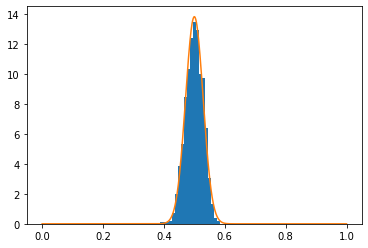

In [9]:
#Tracé de l'histogramme
plt.hist(zs,bins=101,range=(0.,1.),density=True)
#Tracé de la gaussienne correspondant
xs=np.linspace(0,1,1000)
plt.plot(xs, norm.pdf(xs,loc=0.5,scale=1/(np.sqrt(12*n)) ) )

Encore une fois, on voit que pour une distribution uniforme, on tend vers une distribution gaussienne pour la moyenne de $n$ valeurs -- comme dans le cas précédent. Le plus compliqué étant de calculer la valeur de $V(z_i)$ (ou $\sigma_{z_i}$) pour chaque cas.

<span id="triang"></span>

### Distribution triangulaire
Il suffit de faire la même chose en adaptant la distribution et le lien entre la variance/écart-type et la distribution.
<span id="triang1"></span>

la valeur moyenne correspondante est : 0.53


"pour mieux voir le fait de tirer dans une distribution triangulaire,\nil est possible d'augmenter la valeur de n temporairement"

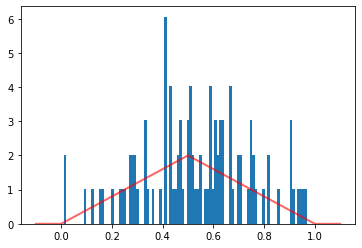

In [10]:
 #Ici, on choisit de faire un tirage de n valeurs
premier_tirage = np.random.triangular(0.,0.5,1., size=n)
plt.hist(premier_tirage,bins=101,range=(0.,1.),density=True)

#affichage de la fonction de distribution théorique
from scipy.stats import triang
xs = np.linspace(-0.1,1.1,1000)
plt.plot(xs, triang.pdf(xs,0.5,loc=0,scale=1),'r-', lw=2, alpha=0.6, label='distribution uniforme')
#on additionne les n valeurs et on prend la moyenne
z0 = np.sum(premier_tirage)/n
print('la valeur moyenne correspondante est : {:.2f}'.format(z0))
"""pour mieux voir le fait de tirer dans une distribution triangulaire,
 il est possible d'augmenter la valeur de n temporairement"""

Et comme précédemment, on peut faire $p$ tirages puis chercher la fonction gaussienne correspondante à partir de la valeur moyenne et de l'écart-type.
<span id="triang2"></span>

moyenne: 0.5000330579714618 variance : 0.00044137652006565644 écart-type : 0.021008962850784817


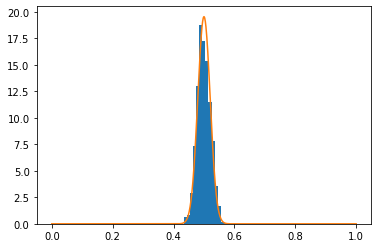

In [11]:
#on répète maintenant l'opération p fois
zs = np.sum(np.random.triangular(0.,0.5,1., size=(n,p)), axis = 0 )/n
#Moyenne de la distribution
moyenne = np.average(zs)
#variance de la distribution
variance = np.var(zs,ddof=1)
ecartType= np.std(zs,ddof=1)
print('moyenne: {} variance : {} écart-type : {}'.format(moyenne, variance,ecartType))
#Tracé de l'histogramme
plt.hist(zs,bins=101,range=(0.,1.),density=True)
#Tracé de la gaussienne correspondant
xs=np.linspace(0,1,1000)
plt.plot(xs, norm.pdf(xs,loc=0.5,scale=1/(np.sqrt(24*n)) ) )

<span id="cauchy"></span>
### Une distribution qui ne vérifie pas le théorème central limite : distribution de Lorentz/Cauchy

Si on vient de voir qu'à priori quelle que soit la distribution initiale, on finit par avoir une distribution gaussienne de la moyenne. Il ne faut pas pour autant généraliser trop vite ! Il faut en effet que les variables $z_i$ ait une variance ou un écart-type qui soit défini. Si ce n'est pas le cas, alors la convergence n'est pas assurée. 

Nous allons le mettre en évidence avec une distribution de Cauchy/distribution de Lorentz. Cette distribution n'est pas « juste » une curiosité mathématique : elle décrit la distribution spectrale d'une raie d'émission d'un gaz soumis à des chocs, elle décrit aussi la forme des pics en diffraction des rayons X, etc.

la valeur moyenne correspondante est : 1.46


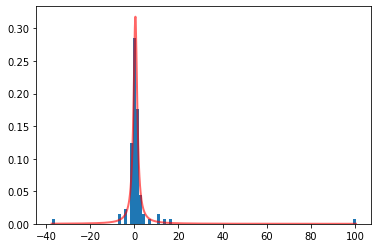

In [12]:
 #Ici, on choisit de faire un tirage de n valeurs
from scipy.stats import cauchy
premier_tirage = cauchy.rvs(loc=0.5,scale=1,size=n)
plt.hist(premier_tirage,bins=101,density=True)

#affichage de la fonction de distribution théorique
xs = np.linspace(np.min(premier_tirage),np.max(premier_tirage),1000)
plt.plot(xs, cauchy.pdf(xs,loc=0.5,scale=1),'r-', lw=2, alpha=0.6)
#on additionne les n valeurs et on prend la moyenne
z0 = np.sum(premier_tirage)/n
print('la valeur moyenne correspondante est : {:.2f}'.format(z0))

moyenne: -2.9369687960432582 variance : 4231.795468223023 écart-type : 65.05225183053253


"exécuter le code plusieurs fois pour voir qu'en plus de cela, ni la moyenne ni l'écart-type ne convergent"

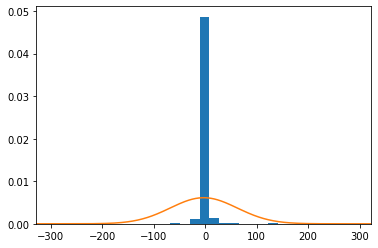

In [13]:
#on répète maintenant l'opération p fois
zs = np.sum(cauchy.rvs(loc=0.5,scale=1., size=(n,p)), axis = 0 )/n
#Moyenne de la distribution
moyenne = np.average(zs)
#variance de la distribution
variance = np.var(zs,ddof=1)
ecartType= np.std(zs,ddof=1)
print('moyenne: {} variance : {} écart-type : {}'.format(moyenne, variance,ecartType))
#Tracé de l'histogramme
plt.hist(zs,bins=101,range=(np.min(zs),np.max(zs)),density=True)
#Tracé de la gaussienne correspondant
xs=np.linspace(moyenne-5*ecartType,moyenne+5*ecartType,1000)
plt.plot(xs, norm.pdf(xs,loc=moyenne,scale=ecartType ) )
plt.xlim(moyenne-5*ecartType,moyenne+5*ecartType)
"""exécuter le code plusieurs fois pour voir qu'en plus de cela, ni la moyenne ni l'écart-type ne convergent"""

Text(0.5, 1.0, "évolution de l'écart-type obtenu")

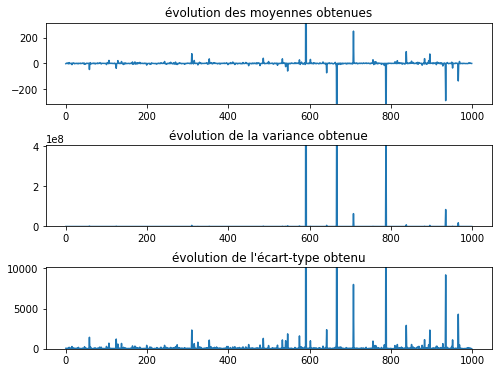

In [14]:
"""répétition sur 1000 distributions de p moyennes faites à partir de n tirages """
zs = np.sum(cauchy.rvs(loc=0.5,scale=1., size=(n,p,1000)), axis = 0 )/n
#Moyenne de la distribution
moyennes = np.average(zs,axis=0)
#variance de la distribution
variances = np.var(zs,ddof=1,axis=0)
ecartTypes = np.std(zs,ddof=1,axis=0)

##Valeurs moyennes et écart-types pour les 1000 tirages de 1000 tirages
MoyenneMoyenne = np.average(moyennes)
ecartTypeMoyenne = np.std(moyennes,ddof=1)
MoyenneVariance = np.average(variances)
ecartTypeVariance = np.std(variances,ddof=1)
MoyenneEcarttype = np.average(ecartTypes)
ecartTypeEcarttype = np.std(ecartTypes,ddof=1)

fig = plt.figure(figsize=(8,6))
gs = fig.add_gridspec(3, 1,hspace=0.5)
#tracé de la moyenne sur 1000 tirages de 1000 tirages
xs = np.arange(1000)
ax1 = fig.add_subplot(gs[0,0])
ax1.plot(xs,moyennes)
ax1.set_ylim(MoyenneMoyenne-5*ecartTypeMoyenne,MoyenneMoyenne+5*ecartTypeMoyenne)
ax1.set_title('évolution des moyennes obtenues')
#tracé de la variance sur 1000 tirages de 1000 tirages
ax2 = fig.add_subplot(gs[1,0])
ax2.plot(xs,variances)
ax2.set_ylim(0,MoyenneVariance+5*ecartTypeVariance)
ax2.set_title('évolution de la variance obtenue')
#tracé de l'écart-type sur 1000 tirages de 1000 tirages
ax3 = fig.add_subplot(gs[2,0])
ax3.plot(xs,ecartTypes)
ax3.set_ylim(0,MoyenneEcarttype+5*ecartTypeEcarttype)
ax3.set_title('évolution de l\'écart-type obtenu')

Text(0.5, 1.0, "évolution de l'écart-type obtenu")

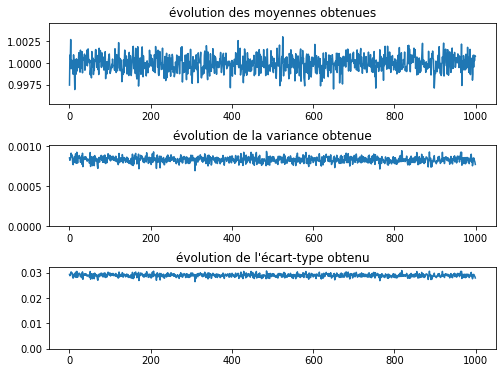

In [15]:
"""à comparer avec les résultats pour une distribution rectangulaire"""
"""répétition sur 1000 distributions de p moyennes faites à partir de n tirages """
zs = np.sum(uniform.rvs(loc=0.5,scale=1., size=(n,p,1000)), axis = 0 )/n
#Moyenne de la distribution
moyennes = np.average(zs,axis=0)
#variance de la distribution
variances = np.var(zs,ddof=1,axis=0)
ecartTypes = np.std(zs,ddof=1,axis=0)

##Valeurs moyennes et écart-types pour les 1000 tirages de 1000 tirages
MoyenneMoyenne = np.average(moyennes)
ecartTypeMoyenne = np.std(moyennes,ddof=1)
MoyenneVariance = np.average(variances)
ecartTypeVariance = np.std(variances,ddof=1)
MoyenneEcarttype = np.average(ecartTypes)
ecartTypeEcarttype = np.std(ecartTypes,ddof=1)

fig = plt.figure(figsize=(8,6))
gs = fig.add_gridspec(3, 1,hspace=0.5)
#tracé de la moyenne sur 1000 tirages de 1000 tirages
xs = np.arange(1000)
ax1 = fig.add_subplot(gs[0,0])
ax1.plot(xs,moyennes)
ax1.set_ylim(MoyenneMoyenne-5*ecartTypeMoyenne,MoyenneMoyenne+5*ecartTypeMoyenne)
ax1.set_title('évolution des moyennes obtenues')
#tracé de la variance sur 1000 tirages de 1000 tirages
ax2 = fig.add_subplot(gs[1,0])
ax2.plot(xs,variances)
ax2.set_ylim(0,MoyenneVariance+5*ecartTypeVariance)
ax2.set_title('évolution de la variance obtenue')
#tracé de l'écart-type sur 1000 tirages de 1000 tirages
ax3 = fig.add_subplot(gs[2,0])
ax3.plot(xs,ecartTypes)
ax3.set_ylim(0,MoyenneEcarttype+5*ecartTypeEcarttype)
ax3.set_title('évolution de l\'écart-type obtenu')

On peut voir que pour la distribution de Cauchy, les résultats ne sont pas stables du tout comparés à ceux obtenus pour la distribution rectangulaire.

# Vitesse de la convergence
Nous avons vu que sur plusieurs exemples, la distribution de la moyenne convergeait vers la distribution gaussienne. Cependant, nous n'avons pas vu d'éléments sur la **rapidité** de la convergence. Cela va dépendre du type de distribution considérée comme le montre le graphique ci-dessous.

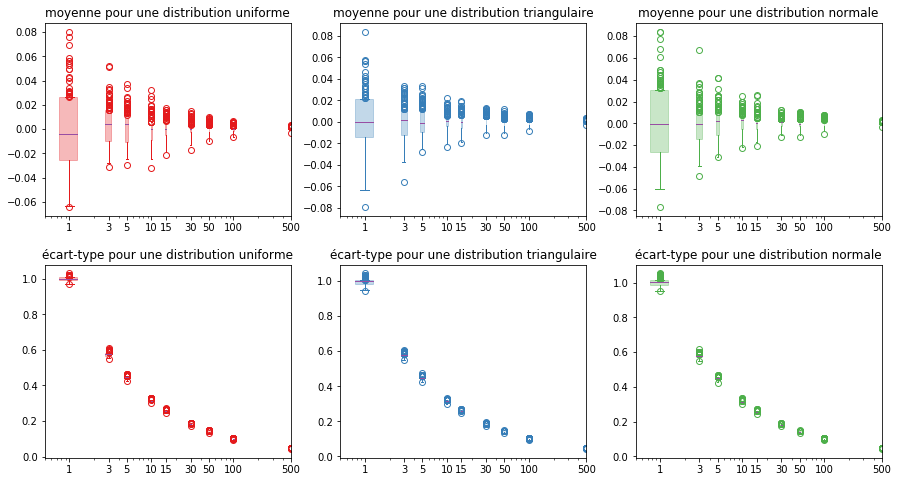

In [45]:
ns = [1,3,5,10,15,30,50,100,500]
distribs = ['uniforme','triangulaire','normale']
#distribs = ['uniforme']
results = {'uniforme':{'moyenne':[],'ecarttype':[],'color':'#e41a1c'},
          'triangulaire':{'moyenne':[],'ecarttype':[],'color':'#377eb8'},
          'normale':{'moyenne':[],'ecarttype':[],'color':'#4daf4a'}}
p = 1000
q = 100
for n in ns:
    for distrib in distribs:
        """répétition sur 1000 distributions de p moyennes faites à partir de n tirages """
        if distrib == 'uniforme':
            zs = np.sum(uniform.rvs(loc=-np.sqrt(3),scale=2*np.sqrt(3), size=(n,p,q)), axis = 0 )/n
        elif distrib== 'triangulaire':
            zs = np.sum(triang.rvs(0.5,loc=-np.sqrt(6),scale=2*np.sqrt(6), size=(n,p,q)), axis = 0 )/n  
        elif distrib== 'normale' :
            zs = np.sum(norm.rvs(loc=0,scale=1., size=(n,p,q)), axis = 0 )/n
        #Moyennes de la distribution
        moyennes = np.average(zs,axis=0)
        #Écart-types de la distribution
        ecartTypes = np.std(zs,ddof=1,axis=0)
        results[distrib]['moyenne'].append(moyennes)
        results[distrib]['ecarttype'].append(ecartTypes)
fig = plt.figure(figsize=(15,8))
gs = fig.add_gridspec(2, len(distribs),hspace=0.25)  





for (i,distrib) in enumerate(distribs) :
    ax1 = fig.add_subplot(gs[0,i])
    ax1.set_title('moyenne pour une distribution {}'.format(distrib))
    ax1.set_xscale('log')
    ax1.boxplot(results[distrib]['moyenne'],positions=ns,patch_artist=True,whis=ns,boxprops=dict(alpha=.3,facecolor=results[distrib]['color'], color=results[distrib]['color']),
            capprops=dict(color=results[distrib]['color']),
            whiskerprops=dict(color=results[distrib]['color']),
            flierprops=dict(color=results[distrib]['color'], markeredgecolor=results[distrib]['color']),
            medianprops=dict(color='#984ea3'))
    ax2 = fig.add_subplot(gs[1,i])
    ax2.set_title('écart-type pour une distribution {}'.format(distrib))    
    ax2.set_xscale('log')    
    ax2.boxplot(results[distrib]['ecarttype'],positions=ns,patch_artist=True,whis=ns,boxprops=dict(alpha=.3,facecolor=results[distrib]['color'], color=results[distrib]['color']),
            capprops=dict(color=results[distrib]['color']),
            whiskerprops=dict(color=results[distrib]['color']),
            flierprops=dict(color=results[distrib]['color'], markeredgecolor=results[distrib]['color']),
            medianprops=dict(color='#984ea3'))
